# Hotel Bookings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#using colab 
url = 'https://raw.githubusercontent.com/widosenoatri/final_project/master/hotel_bookings.csv'

# #using jupyter 
# url = 'hotel_bookings.csv'

df = pd.read_csv(url)

In [3]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [102]:
df.groupby('arrival_date_month')['adults'].mean()

arrival_date_month
April        1.876274
August       2.002955
December     1.826254
February     1.791026
January      1.690673
July         1.987521
June         1.860591
March        1.804676
May          1.826732
November     1.690904
October      1.817115
September    1.872954
Name: adults, dtype: float64

In [0]:
SELECT 'arrival_date_month', AVG('adults') as 'rata_dewasa'
FROM df
GROUP BY 'arrival_date_month' 

In [4]:
dfDesc = []
for i in df.columns:
    dfDesc.append([df[i].dtypes,
                   len(df[i].dropna()),
                   df[i].isna().sum(),
                   round((((df[i].isna().sum())/(len(df)))*100),2),
                   df[i].nunique(),
                   df[i].value_counts().sort_values(ascending=False).index[0],
                   list(df[i].value_counts())[0]])
    
pd.DataFrame(dfDesc, columns = ['dataType', 'count', 'null', 'null%', 'unique', 'top', 'freq'], index = df.columns.values)

,dataType,count,null,null%,unique,top,freq
hotel,object,119390,0,0.00,2,City Hotel,79330
is_canceled,int64,119390,0,0.00,2,0,75166
lead_time,int64,119390,0,0.00,479,0,6345
arrival_date_year,int64,119390,0,0.00,3,2016,56707
arrival_date_month,object,119390,0,0.00,12,August,13877
arrival_date_week_number,int64,119390,0,0.00,53,33,3580
arrival_date_day_of_month,int64,119390,0,0.00,31,17,4406
stays_in_weekend_nights,int64,119390,0,0.00,17,0,51998
stays_in_week_nights,int64,119390,0,0.00,35,2,33684
adults,int64,119390,0,0.00,14,2,89680


# Exploratory Data Analysis

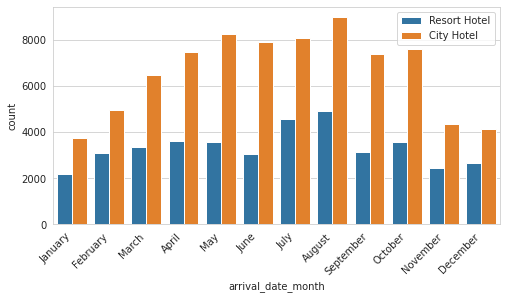

In [5]:
# Arrival date based on type of hotel
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = 'arrival_date_month', hue='hotel', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.legend(loc='upper right')
plt.show()

From the chart above we can clearly see that there more City Hotel types rather than Resort Hotel types that are booked.

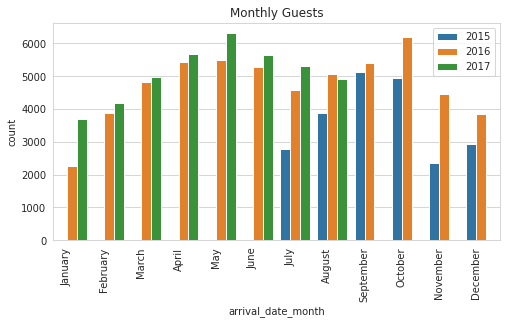

In [6]:
# Monthly Guests per year
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = 'arrival_date_month', hue='arrival_date_year', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.legend(loc='upper right')
plt.title('Monthly Guests')
plt.show()

- From the chart above, we can see that the data ranges from July 2015 - August 2017
- The only data that has all the months in the year is the year 2016

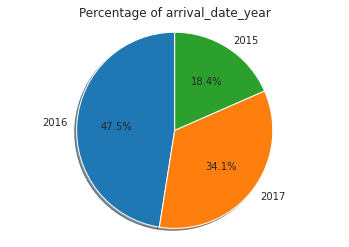

In [7]:
# Percentage of data from each year
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(pd.DataFrame(df['arrival_date_year'].value_counts()).index)
sizes = list(pd.DataFrame(df['arrival_date_year'].value_counts())['arrival_date_year'])

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of arrival_date_year')
plt.show()

- From the pie chart above the percentages of the year are shown

No handles with labels found to put in legend.


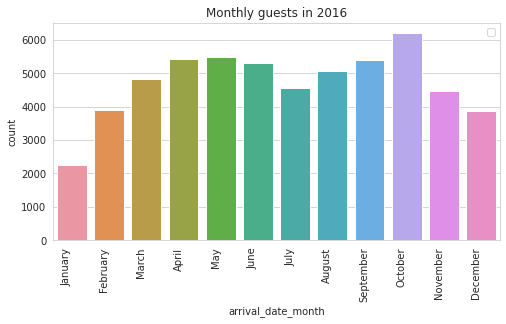

In [8]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df[df['arrival_date_year']==2016], x = 'arrival_date_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.legend(loc='upper right')
plt.title('Monthly guests in 2016')
plt.show()

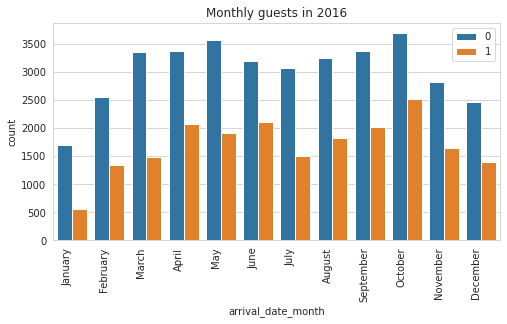

In [9]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df[df['arrival_date_year']==2016], x = 'arrival_date_month', hue='is_canceled', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.legend(loc='upper right')
plt.title('Monthly guests in 2016')
plt.show()

From the previous chart, the only year that has all the year is 2016, therefore for a full year comparison we use it to compare the cancelled and the non-cancelled bookings

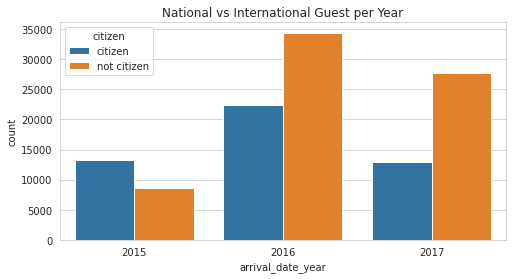

[Text(0, 0, '2015'), Text(1, 0, '2016'), Text(2, 0, '2017')]

In [10]:
def local_not(cols):
    if cols == 'PRT':
        return 'citizen'
    else:
        return 'not citizen'
    
df_plot = df.copy()
df_plot['citizen'] = df_plot['country'].apply(local_not)

plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot, x = 'arrival_date_year', hue = 'citizen')
plt.title('National vs International Guest per Year')
plt.show()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

From the chart above: 
- the year 2015 has more national guests compared to 2016 and 2017 
- 2016 and 2017 have more international guests

Text(0.5, 1.0, 'Local vs International Guest 2016 (Canceled/Not Canceled)')

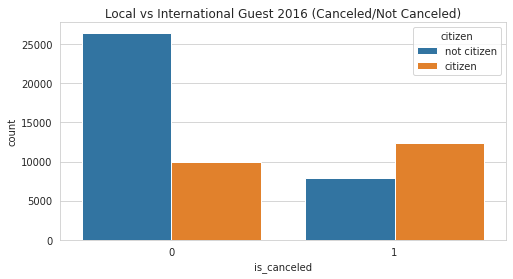

In [11]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot[df_plot['arrival_date_year']==2016], x = 'is_canceled', hue = 'citizen')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Local vs International Guest 2016 (Canceled/Not Canceled)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

From the chart above, the comparison between the citizen in 2016 is shown grouped by whether or not the guests have canceled their bookings
- more national guests are cancelling their bookings in 2016 compared to international guests

In [12]:
df.groupby('deposit_type')['is_canceled'].value_counts()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    1              14494
              0                 93
Refundable    0                126
              1                 36
Name: is_canceled, dtype: int64

**Same Room and Different Room Comparison**

In [13]:
same_room = []
diff_room = []
for idx, val in enumerate(df['reserved_room_type']):
    if(val == df_plot['assigned_room_type'][idx]):
        same_room.append(idx)
    else:
        diff_room.append(idx)
len(df_plot.iloc[same_room])

104473

In [14]:
len(df_plot.iloc[diff_room])

14917

is_canceled based on deposit type

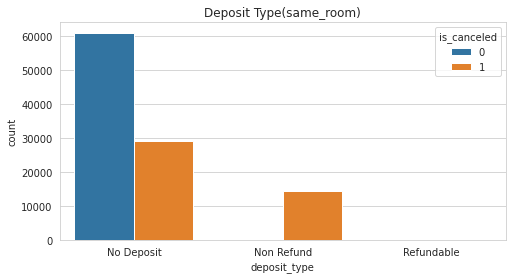

is_canceled  deposit_type
0            No Deposit      60878
             Refundable         91
             Non Refund         82
1            No Deposit      28970
             Non Refund      14417
             Refundable         35
Name: deposit_type, dtype: int64


In [15]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot.iloc[same_room], x = 'deposit_type', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Deposit Type(same_room)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

print(df_plot.iloc[same_room].groupby('is_canceled')['deposit_type'].value_counts())

The chart above shows the cancellations based on deposit type if they have the same room with their requested rooms
- More guests are likely to cancel if they do not have deposit, though some still cancel eventhough there is a Non-Refundable deposit
- Refundable deposits however have the least cancelled bookings compared to all

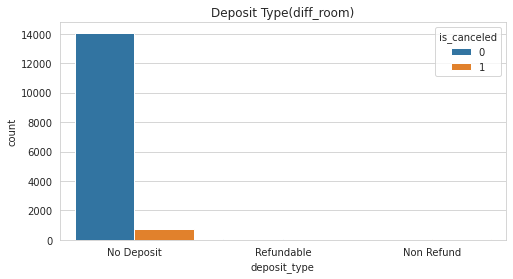

is_canceled  deposit_type
0            No Deposit      14069
             Refundable         35
             Non Refund         11
1            No Deposit        724
             Non Refund         77
             Refundable          1
Name: deposit_type, dtype: int64


In [16]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot.iloc[diff_room], x = 'deposit_type', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Deposit Type(diff_room)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
print(df_plot.iloc[diff_room].groupby('is_canceled')['deposit_type'].value_counts())

The chart above shows the cancellations based on deposit type if they have different room with their requested rooms
- Eventhough they have different rooms than they have requested, they have fewer cancellations than those that have the same room

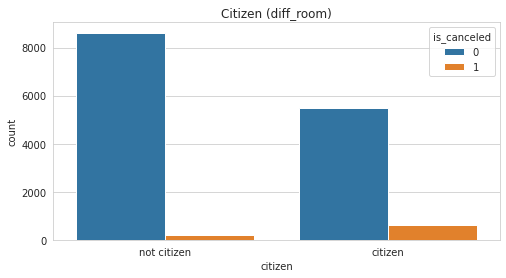

is_canceled  citizen    
0            not citizen    8619
             citizen        5496
1            citizen         613
             not citizen     189
Name: citizen, dtype: int64


In [17]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot.iloc[diff_room], x = 'citizen', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Citizen (diff_room)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
print(df_plot.iloc[diff_room].groupby('is_canceled')['citizen'].value_counts())

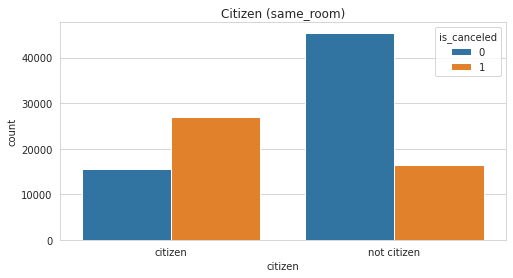

is_canceled  citizen    
0            not citizen    45476
             citizen        15575
1            citizen        26906
             not citizen    16516
Name: citizen, dtype: int64


In [18]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot.iloc[same_room], x = 'citizen', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Citizen (same_room)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
print(df_plot.iloc[same_room].groupby('is_canceled')['citizen'].value_counts())

Market Segment

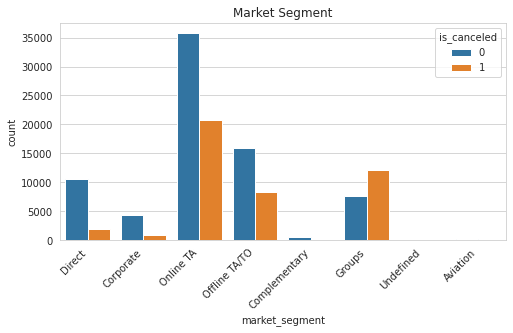

is_canceled  market_segment
0            Online TA         35738
             Offline TA/TO     15908
             Direct            10672
             Groups             7714
             Corporate          4303
             Complementary       646
             Aviation            185
1            Online TA         20739
             Groups            12097
             Offline TA/TO      8311
             Direct             1934
             Corporate           992
             Complementary        97
             Aviation             52
             Undefined             2
Name: market_segment, dtype: int64


In [19]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot, x = 'market_segment', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Market Segment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
print(df_plot.groupby('is_canceled')['market_segment'].value_counts())

- Groups have more cancellations than not-cancelled bookings
- Online TA have the most cancellations than other marketing segment, although they have the highest contribution of bookings, and the highest no-cancelled bookings


In [20]:
df[(~df['company'].isna()) & (~df['agent'].isna())]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


# Odd Data:

**Adults   = 0**

**Children = 0**

**Babies   = 0**

In [21]:
df[(df['adults']==0) & (df['babies']==0) & (df['children']==0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


There are 180 data that have no guests, 0 adults, 0 children, 0 babies

**0 number of *stays_in_week_nights* and 0 number of *stays_in_weekend_nights*, and not canceled:**

In [22]:
df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0) & (df['is_canceled']==0)].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07


Some data have 0 number of stays in week and weekend nights, though they have

**Drop the odd data**

In [23]:
idx1 = list(df[(df['adults']==0) & (df['babies']==0) & (df['children']==0)].index)
idx2 = list(df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0) & (df['is_canceled']==0)].index)

idx_drop = idx1

in_first = set(idx1)
in_second = set(idx2)

in_second_but_not_in_first = in_second - in_first

idx_drop = idx1 + list(in_second_but_not_in_first)
print(idx_drop[:5])

print(len(idx1))
print(len(idx2))
print(len(idx_drop))

[2224, 2409, 3181, 3684, 3708]
180
680
802


In [24]:
df_no_odd = df.drop(index=idx_drop)
df_no_odd = df_no_odd.reset_index(drop=True)
df_no_odd.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
118583,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
118584,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
118585,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
118586,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
118587,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [25]:
df_no_odd[(df_no_odd['stays_in_weekend_nights']==0) & (df_no_odd['stays_in_week_nights']==0) & (df_no_odd['is_canceled']==0)].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [26]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

***reservation_status* and *is_canceled* is the same, those who haven't checked out are considered as canceled**

In [27]:
print("Canceled value from the feature 'reservation_status': " + str(len(df[(df['reservation_status']=='No-Show')])+len(df[(df['reservation_status']=='Canceled')])))
print("Canceled value from the feature 'is_canceled'       : " + str(len(df[(df['is_canceled']==1)])))

print("\nNot Canceled value from the feature 'reservation_status': " + str(len(df[df['reservation_status']=='Check-Out'])))
print("Not Canceled value from the feature 'is_canceled'       : " + str(len(df[(df['is_canceled']==0)])))


Canceled value from the feature 'reservation_status': 44224
Canceled value from the feature 'is_canceled'       : 44224

Not Canceled value from the feature 'reservation_status': 75166
Not Canceled value from the feature 'is_canceled'       : 75166


***reservation_status* might lead to high correlation with the dependent variable *is_canceled***

# Data Cleaning

## Preprocessing

**Change to object for categorical variables**

In [0]:
# df_no_odd['arrival_date_year'] = df_no_odd['arrival_date_year'].astype('object')
# df_no_odd['arrival_date_week_number'] = df_no_odd['arrival_date_week_number'].astype('object')
# df_no_odd['arrival_date_day_of_month'] = df_no_odd['arrival_date_day_of_month'].astype('object')
# df_no_odd['is_repeated_guest'] = df_no_odd['is_repeated_guest'].astype('object')
# df_no_odd['agent'] = df_no_odd['agent'].astype('object')
# df_no_odd['company'] = df_no_odd['company'].astype('object')

In [29]:
dfDesc = []
for i in df_no_odd.columns:
    dfDesc.append([df_no_odd[i].dtypes,
                   len(df_no_odd[i].dropna()),
                   df_no_odd[i].isna().sum(),
                   round((((df_no_odd[i].isna().sum())/(len(df_no_odd)))*100),2),
                   df_no_odd[i].nunique(),
                   df_no_odd[i].value_counts().sort_values(ascending=False).index[0],
                   list(df_no_odd[i].value_counts())[0]])

pd.DataFrame(dfDesc, columns = ['dataType', 'count', 'null', 'null%', 'unique', 'top', 'freq'], index = df_no_odd.columns.values)

,dataType,count,null,null%,unique,top,freq
hotel,object,118588,0,0.00,2,City Hotel,78912
is_canceled,int64,118588,0,0.00,2,0,74389
lead_time,int64,118588,0,0.00,478,0,6012
arrival_date_year,int64,118588,0,0.00,3,2016,56253
arrival_date_month,object,118588,0,0.00,12,August,13812
arrival_date_week_number,int64,118588,0,0.00,53,33,3564
arrival_date_day_of_month,int64,118588,0,0.00,31,17,4350
stays_in_weekend_nights,int64,118588,0,0.00,17,0,51273
stays_in_week_nights,int64,118588,0,0.00,33,2,33670
adults,int64,118588,0,0.00,14,2,89265


**Before dummies, lets reduce the unique values of some features, to reduce high dimensionality**

In [30]:
dfDesc = []
for i in df_no_odd.select_dtypes('object').columns:
    dfDesc.append([df_no_odd[i].nunique(),
                    df_no_odd[i].value_counts().sort_values(ascending=False).index[0],
                    list(df_no_odd[i].value_counts())[0]])

pd.DataFrame(dfDesc, columns = ['unique', 'top', 'freq'], index = df_no_odd.select_dtypes('object').columns.values)

,unique,top,freq
hotel,2,City Hotel,78912
arrival_date_month,12,August,13812
meal,5,BB,91741
country,177,PRT,47955
market_segment,8,Online TA,56141
distribution_channel,5,TA/TO,97348
reserved_room_type,9,A,85416
assigned_room_type,11,A,73804
deposit_type,3,No Deposit,103839
customer_type,4,Transient,88956


'country', 'agent', and 'company' has too more than 100 unique values, I think it's better to generalize the values.

- 'country' feature to be changed to citizen(PRT) and non-citizen guests
- 'agent' feature to be dropped
- 'company' feature to be dropped
- 'meal' feature has some ambiguous meaning, SC and Undefined are the same thing, but there are two values in the data, change into SC

In [31]:
def change_country(cols):
  if cols == 'PRT':
    return 'citizen'
  else:
    return 'not citizen'
df_no_odd['citizen'] = df_no_odd['country'].apply(change_country)
df_no_odd.drop('country', axis=1, inplace=True)
df_no_odd['citizen'].value_counts()

not citizen    70633
citizen        47955
Name: citizen, dtype: int64

In [0]:
df_no_odd.drop('agent', axis=1, inplace=True)

In [0]:
df_no_odd.drop('company', axis=1, inplace=True)

In [0]:
df_no_odd.dropna(axis=0, inplace=True)
df_no_odd.reset_index(drop=True)
df_no_odd['children'] = df_no_odd['children'].astype('int64')

In [35]:
df_no_odd['meal'].value_counts()

BB           91737
HB           14384
SC           10506
Undefined     1160
FB             797
Name: meal, dtype: int64

In [36]:
def change_meal(cols):
  if cols == 'Undefined':
    return 'SC'
  else:
    return cols
df_no_odd['meal'] = df_no_odd['meal'].apply(change_meal)
df_no_odd['meal'].value_counts()

BB    91737
HB    14384
SC    11666
FB      797
Name: meal, dtype: int64

# Analyzing Data for Modelling

**Check the correlation between the independent and the dependent variable**

In [37]:
def cramers_v(x,y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r -((r-1)**2)/(n-1)
    kcorr = k -((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat==i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

categorical_cols_df = df.drop('reservation_status_date', axis=1).select_dtypes('object').columns
categorical_cols_df

categorical_cols = df_no_odd.drop('reservation_status_date', axis=1).select_dtypes('object').columns
categorical_cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'citizen'],
      dtype='object')

In [38]:
Cramers_V = [] 
Mycolumn = [] 

# #Categorical cols in df_no_odd(country)
# for i in categorical_cols_df: 
#   Mycolumn.append(i) 
#   Cramers_V.append(cramers_v(df[i],df['is_canceled']))

#Categorical cols in df_no_odd(citizen)
for i in categorical_cols: 
  Mycolumn.append(i) 
  Cramers_V.append(cramers_v(df_no_odd[i],df_no_odd['is_canceled']))

res = pd.DataFrame(data = [Mycolumn,Cramers_V]).T 
res.columns = ['Column','Cramers_V'] 
res.sort_values(by = 'Cramers_V', ascending = False)

,Column,Cramers_V
9,reservation_status,0.999996
7,deposit_type,0.480963
10,citizen,0.342236
3,market_segment,0.266131
6,assigned_room_type,0.199101
4,distribution_channel,0.176258
8,customer_type,0.137865
0,hotel,0.135486
5,reserved_room_type,0.0728517
1,arrival_date_month,0.0684688


reservation_status is too correlated, therefore it is better to drop this column instead

In [0]:
df_no_odd.drop('reservation_status', axis=1, inplace=True)

**spearman/pearson correlation**

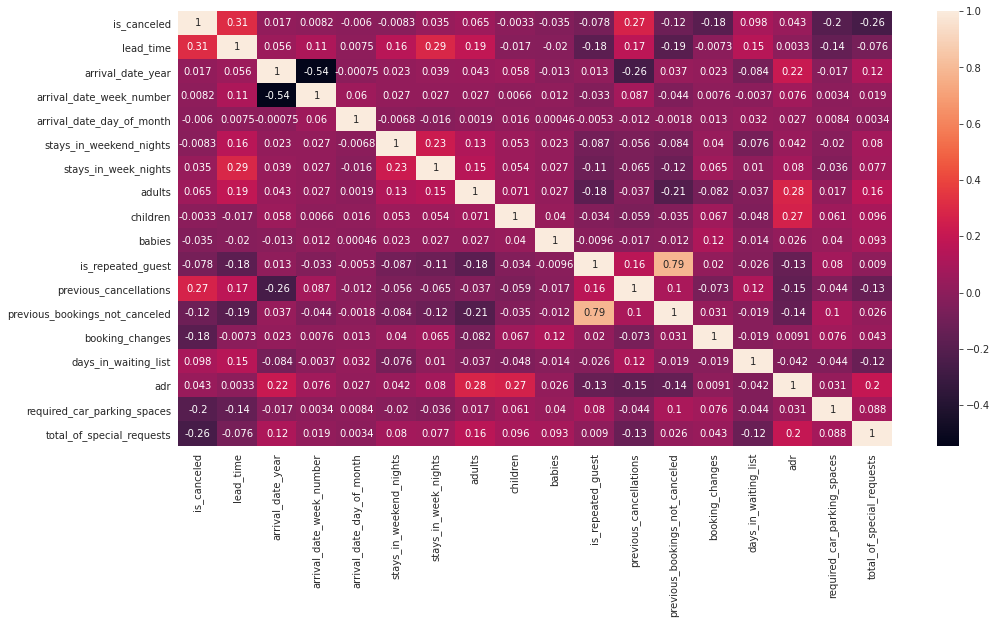

In [40]:
plt.figure(figsize=(16,8))
sns.heatmap(df_no_odd.corr(method='spearman'), annot=True)

In [41]:
cat_feat = list(df_no_odd.drop('reservation_status_date', axis=1).select_dtypes(include = 'object').columns.values)
num_feat = list(df_no_odd.drop('is_canceled', axis=1).select_dtypes(exclude = 'object').columns.values)
print(num_feat)
print(cat_feat)
features_df = num_feat + cat_feat
print(features_df)

['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'citizen']
['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_ty

**Dummies Variable**

In [0]:
features_df = num_feat + cat_feat
x = df_no_odd[features_df]
y = df_no_odd['is_canceled']
df_dummies = pd.get_dummies(x, drop_first = True)

In [43]:
df_dummies.head

<bound method NDFrame.head of         lead_time  ...  citizen_not citizen
0               7  ...                    1
1              13  ...                    1
2              14  ...                    1
3              14  ...                    1
4               0  ...                    0
...           ...  ...                  ...
118583         23  ...                    1
118584        102  ...                    1
118585         34  ...                    1
118586        109  ...                    1
118587        205  ...                    1

[118584 rows x 66 columns]>

**Scale the Dummies**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_dummies), columns = df_dummies.columns)

**Reduce dimension using PCA**

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components = 36, random_state = 101)

In [48]:
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
# df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])
# df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_pca.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.694567,4.601484,0.567173,-0.446479,0.039755,-0.062042,0.742374,-0.54036,0.058933,-0.700550,4.585414,-1.362721,-0.578229,0.064074,0.649134,-0.256330,0.611947,-0.067878,-2.756751,0.417741,-0.380761,-0.775551,0.157762,0.093468,0.732994,-0.237381,0.635330,0.225962,1.120674,-0.547192,-0.614426,-0.37151,0.441688,-0.710901,-0.492030,0.508704
1,-0.569319,2.383005,-1.209994,-0.553948,-1.371044,-0.123877,-0.712021,1.34550,0.215075,1.131591,0.128454,0.046625,0.123146,0.201968,0.579743,0.333504,-0.121377,-2.138263,-2.735724,0.299545,-0.345787,-0.414451,0.137505,0.897813,0.269742,0.458299,0.037061,0.483598,0.505787,-0.693515,-0.104289,-0.61210,0.871852,-0.859644,-0.213887,1.583035


In [49]:
pca.explained_variance_ratio_.sum()

0.8149689427043544

# Modelling

### Original

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_dummies.values, y, test_size = 0.2, random_state = 101)

In [52]:
pd.DataFrame(x_train, columns=df_dummies.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94867 entries, 0 to 94866
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       94867 non-null  float64
 1   arrival_date_year               94867 non-null  float64
 2   arrival_date_week_number        94867 non-null  float64
 3   arrival_date_day_of_month       94867 non-null  float64
 4   stays_in_weekend_nights         94867 non-null  float64
 5   stays_in_week_nights            94867 non-null  float64
 6   adults                          94867 non-null  float64
 7   children                        94867 non-null  float64
 8   babies                          94867 non-null  float64
 9   is_repeated_guest               94867 non-null  float64
 10  previous_cancellations          94867 non-null  float64
 11  previous_bookings_not_canceled  94867 non-null  float64
 12  booking_changes                 

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

### Oversampled Data

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101, sampling_strategy='minority')
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [55]:
pd.DataFrame(x_train_sm, columns = df_dummies.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118924 entries, 0 to 118923
Data columns (total 66 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       118924 non-null  float64
 1   arrival_date_year               118924 non-null  float64
 2   arrival_date_week_number        118924 non-null  float64
 3   arrival_date_day_of_month       118924 non-null  float64
 4   stays_in_weekend_nights         118924 non-null  float64
 5   stays_in_week_nights            118924 non-null  float64
 6   adults                          118924 non-null  float64
 7   children                        118924 non-null  float64
 8   babies                          118924 non-null  float64
 9   is_repeated_guest               118924 non-null  float64
 10  previous_cancellations          118924 non-null  float64
 11  previous_bookings_not_canceled  118924 non-null  float64
 12  booking_changes 

In [56]:
df_dummies.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'arrival_date_month_August', 'arrival_date_month_December',
       'arrival_date_month_February', 'arrival_date_month_January',
       'arrival_date_month_July', 'arrival_date_month_June',
       'arrival_date_month_March', 'arrival_date_month_May',
       'arrival_date_month_November', 'arrival_date_month_October',
       'arrival_date_month_September', 'meal_FB', 'meal_HB', 'meal_SC',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'mar

## 1. Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg_sm = LogisticRegression()

In [58]:
logreg.fit(x_train, y_train)

logreg_sm.fit(x_train_sm, y_train_sm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict the x_test:

logreg_pred = logreg.predict(x_train)
logreg_pred_sm = logreg_sm.predict(x_train_sm)

logreg_pred_test = logreg.predict(x_test)
logreg_pred_sm_test = logreg_sm.predict(x_test)

In [60]:
print('--------------------Original Train Data--------------------')
print(pd.DataFrame(confusion_matrix(y_train, logreg_pred), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Train Data------------------')
print(pd.DataFrame(confusion_matrix(y_train_sm, logreg_pred_sm), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))


print('\n--------------------Original Test Data--------------------')
print(pd.DataFrame(confusion_matrix(y_test, logreg_pred_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Test Data------------------')
print(pd.DataFrame(confusion_matrix(y_test, logreg_pred_sm_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

--------------------Original Train Data--------------------
          Predict 0  Predict 1
Actual 0      54188       5274
Actual 1      16441      18964

-------------------Oversampled Train Data------------------
          Predict 0  Predict 1
Actual 0      43256      16206
Actual 1      15102      44360

--------------------Original Test Data--------------------
          Predict 0  Predict 1
Actual 0      13653       1274
Actual 1       4104       4686

-------------------Oversampled Test Data------------------
          Predict 0  Predict 1
Actual 0      10815       4112
Actual 1       2343       6447


In [61]:
print('--------------------Original Train Data--------------------')
print(classification_report(y_train, logreg_pred))

print('\n-------------------Oversampled Train Data------------------')
print(classification_report(y_train_sm, logreg_pred_sm))


print('\n--------------------Original Test Data--------------------')
print(classification_report(y_test, logreg_pred_test))

print('\n-------------------Oversampled Test Data------------------')
print(classification_report(y_test, logreg_pred_sm_test))

--------------------Original Train Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     59462
           1       0.78      0.54      0.64     35405

    accuracy                           0.77     94867
   macro avg       0.77      0.72      0.73     94867
weighted avg       0.77      0.77      0.76     94867


-------------------Oversampled Train Data------------------
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     59462
           1       0.73      0.75      0.74     59462

    accuracy                           0.74    118924
   macro avg       0.74      0.74      0.74    118924
weighted avg       0.74      0.74      0.74    118924


--------------------Original Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.91      0.84     14927
           1       0.79      0.53      0.64      8790

 

## 2. Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree_sm = DecisionTreeClassifier()

In [63]:
dtree.fit(x_train, y_train)

dtree_sm.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Predict the x_test:

dtree_pred = dtree.predict(x_train)
dtree_pred_sm = dtree_sm.predict(x_train_sm)

dtree_pred_test = dtree.predict(x_test)
dtree_pred_sm_test = dtree_sm.predict(x_test)

In [65]:
print('--------------------Original Train Data--------------------')
print(pd.DataFrame(confusion_matrix(y_train, dtree_pred), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Train Data------------------')
print(pd.DataFrame(confusion_matrix(y_train_sm, dtree_pred_sm), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))


print('\n--------------------Original Test Data--------------------')
print(pd.DataFrame(confusion_matrix(y_test, dtree_pred_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Test Data------------------')
print(pd.DataFrame(confusion_matrix(y_test, dtree_pred_sm_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

--------------------Original Train Data--------------------
          Predict 0  Predict 1
Actual 0      59370         92
Actual 1        293      35112

-------------------Oversampled Train Data------------------
          Predict 0  Predict 1
Actual 0      59300        162
Actual 1        257      59205

--------------------Original Test Data--------------------
          Predict 0  Predict 1
Actual 0      13192       1735
Actual 1       1711       7079

-------------------Oversampled Test Data------------------
          Predict 0  Predict 1
Actual 0      13046       1881
Actual 1       1690       7100


In [66]:
print('--------------------Original Train Data--------------------')
print(classification_report(y_train, dtree_pred))

print('\n-------------------Oversampled Train Data------------------')
print(classification_report(y_train_sm, dtree_pred_sm))


print('\n--------------------Original Test Data--------------------')
print(classification_report(y_test, dtree_pred_test))

print('\n-------------------Oversampled Test Data------------------')
print(classification_report(y_test, dtree_pred_sm_test))

--------------------Original Train Data--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59462
           1       1.00      0.99      0.99     35405

    accuracy                           1.00     94867
   macro avg       1.00      1.00      1.00     94867
weighted avg       1.00      1.00      1.00     94867


-------------------Oversampled Train Data------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59462
           1       1.00      1.00      1.00     59462

    accuracy                           1.00    118924
   macro avg       1.00      1.00      1.00    118924
weighted avg       1.00      1.00      1.00    118924


--------------------Original Test Data--------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     14927
           1       0.80      0.81      0.80      8790

 

## 3. Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_sm = RandomForestClassifier()

In [68]:
rfc.fit(x_train, y_train)

rfc_sm.fit(x_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Predict the x_test:

rfc_pred = rfc.predict(x_train)
rfc_pred_sm = rfc_sm.predict(x_train_sm)

rfc_pred_test = rfc.predict(x_test)
rfc_pred_sm_test = rfc_sm.predict(x_test)

In [70]:
print('--------------------Original Train Data--------------------')
print(pd.DataFrame(confusion_matrix(y_train, rfc_pred), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Train Data------------------')
print(pd.DataFrame(confusion_matrix(y_train_sm, rfc_pred_sm), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))


print('\n--------------------Original Test Data--------------------')
print(pd.DataFrame(confusion_matrix(y_test, rfc_pred_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Test Data------------------')
print(pd.DataFrame(confusion_matrix(y_test, rfc_pred_sm_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

--------------------Original Train Data--------------------
          Predict 0  Predict 1
Actual 0      59322        140
Actual 1        247      35158

-------------------Oversampled Train Data------------------
          Predict 0  Predict 1
Actual 0      59246        216
Actual 1        204      59258

--------------------Original Test Data--------------------
          Predict 0  Predict 1
Actual 0      13946        981
Actual 1       1682       7108

-------------------Oversampled Test Data------------------
          Predict 0  Predict 1
Actual 0      13866       1061
Actual 1       1616       7174


In [71]:
print('--------------------Original Train Data--------------------')
print(classification_report(y_train, rfc_pred))

print('\n-------------------Oversampled Train Data------------------')
print(classification_report(y_train_sm, rfc_pred_sm))


print('\n--------------------Original Test Data--------------------')
print(classification_report(y_test, rfc_pred_test))

print('\n-------------------Oversampled Test Data------------------')
print(classification_report(y_test, rfc_pred_sm_test))

--------------------Original Train Data--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59462
           1       1.00      0.99      0.99     35405

    accuracy                           1.00     94867
   macro avg       1.00      1.00      1.00     94867
weighted avg       1.00      1.00      1.00     94867


-------------------Oversampled Train Data------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59462
           1       1.00      1.00      1.00     59462

    accuracy                           1.00    118924
   macro avg       1.00      1.00      1.00    118924
weighted avg       1.00      1.00      1.00    118924


--------------------Original Test Data--------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14927
           1       0.88      0.81      0.84      8790

 

## 4. Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(learning_rate = 0.01, subsample = 0.5, n_estimators = 100)
gradient_sm = GradientBoostingClassifier(learning_rate = 0.01, subsample = 0.5, n_estimators = 100)

In [73]:
gradient.fit(x_train, y_train)

gradient_sm.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gradient_pred = gradient.predict(x_train)
gradient_pred_sm = gradient_sm.predict(x_train_sm)

gradient_pred_test = gradient.predict(x_test)
gradient_pred_sm_test = gradient_sm.predict(x_test)

In [75]:
print('--------------------Original Train Data--------------------')
print(pd.DataFrame(confusion_matrix(y_train, gradient_pred), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Train Data------------------')
print(pd.DataFrame(confusion_matrix(y_train_sm, gradient_pred_sm), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))


print('\n--------------------Original Test Data--------------------')
print(pd.DataFrame(confusion_matrix(y_test, gradient_pred_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Test Data------------------')
print(pd.DataFrame(confusion_matrix(y_test, gradient_pred_sm_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

--------------------Original Train Data--------------------
          Predict 0  Predict 1
Actual 0      59415         47
Actual 1      22316      13089

-------------------Oversampled Train Data------------------
          Predict 0  Predict 1
Actual 0      48608      10854
Actual 1      10565      48897

--------------------Original Test Data--------------------
          Predict 0  Predict 1
Actual 0      14915         12
Actual 1       5483       3307

-------------------Oversampled Test Data------------------
          Predict 0  Predict 1
Actual 0      12235       2692
Actual 1       1940       6850


In [76]:
print('--------------------Original Train Data--------------------')
print(classification_report(y_train, gradient_pred))

print('\n-------------------Oversampled Train Data------------------')
print(classification_report(y_train_sm, gradient_pred_sm))


print('\n--------------------Original Test Data--------------------')
print(classification_report(y_test, gradient_pred_test))

print('\n-------------------Oversampled Test Data------------------')
print(classification_report(y_test, gradient_pred_sm_test))

--------------------Original Train Data--------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     59462
           1       1.00      0.37      0.54     35405

    accuracy                           0.76     94867
   macro avg       0.86      0.68      0.69     94867
weighted avg       0.83      0.76      0.73     94867


-------------------Oversampled Train Data------------------
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     59462
           1       0.82      0.82      0.82     59462

    accuracy                           0.82    118924
   macro avg       0.82      0.82      0.82    118924
weighted avg       0.82      0.82      0.82    118924


--------------------Original Test Data--------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     14927
           1       1.00      0.38      0.55      8790

 

## 5. XGBoost

In [0]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, n_jobs = -1)
xgboost_sm = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, n_jobs = -1)
xgboost_unbalanced = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, n_jobs = -1, scale_pos_weight = 1.68)

In [78]:
xgboost.fit(x_train, y_train)
xgboost_unbalanced.fit(x_train, y_train)

xgboost_sm.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=101, sampling_strategy='minority')
# x_test_sm, y_test_sm = sm.fit_resample(x_test, y_test)

In [0]:
xgboost_pred = xgboost.predict(x_train)
xgboost_pred_sm = xgboost_sm.predict(x_train_sm)
xgboost_pred_unb = xgboost_unbalanced.predict(x_train)

xgboost_pred_test = xgboost.predict(x_test)
xgboost_pred_sm_test = xgboost_sm.predict(x_test)
xgboost_pred_unb_test = xgboost_unbalanced.predict(x_test)

In [81]:
print('--------------------Original Train Data--------------------')
print(pd.DataFrame(confusion_matrix(y_train, xgboost_pred), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Train Data------------------')
print(pd.DataFrame(confusion_matrix(y_train_sm, xgboost_pred_sm), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))


print('\n--------------------Original Test Data--------------------')
print(pd.DataFrame(confusion_matrix(y_test, xgboost_pred_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

print('\n-------------------Oversampled Test Data------------------')
print(pd.DataFrame(confusion_matrix(y_test, xgboost_pred_sm_test), columns = ['Predict 0', 'Predict 1'], index = ['Actual 0', 'Actual 1']))

--------------------Original Train Data--------------------
          Predict 0  Predict 1
Actual 0      54414       5048
Actual 1       9309      26096

-------------------Oversampled Train Data------------------
          Predict 0  Predict 1
Actual 0      53017       6445
Actual 1       9227      50235

--------------------Original Test Data--------------------
          Predict 0  Predict 1
Actual 0      13652       1275
Actual 1       2344       6446

-------------------Oversampled Test Data------------------
          Predict 0  Predict 1
Actual 0      13292       1635
Actual 1       2081       6709


In [82]:
print('--------------------Original Train Data-----------------')
print(classification_report(y_train, xgboost_pred))

print('\n-------------------Oversampled Train Data-------------')
print(classification_report(y_train_sm, xgboost_pred_sm))

print('\n----------------Oversampled_xgb Train Data-------------')
print(classification_report(y_train, xgboost_pred_unb))


print('\n--------------------Original Test Data---------------')
print(classification_report(y_test, xgboost_pred_test))

print('\n-------------------Oversampled Test Data-------------')
print(classification_report(y_test, xgboost_pred_sm_test))

print('\n----------------Oversampled_xgb Test Data-------------')
print(classification_report(y_test, xgboost_pred_unb_test))

--------------------Original Train Data-----------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     59462
           1       0.84      0.74      0.78     35405

    accuracy                           0.85     94867
   macro avg       0.85      0.83      0.83     94867
weighted avg       0.85      0.85      0.85     94867


-------------------Oversampled Train Data-------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     59462
           1       0.89      0.84      0.87     59462

    accuracy                           0.87    118924
   macro avg       0.87      0.87      0.87    118924
weighted avg       0.87      0.87      0.87    118924


----------------Oversampled_xgb Train Data-------------
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     59462
           1       0.77      0.81      0.79     35405

    accuracy

In [83]:
print("Matthews Correlation Coefficient\n\n")

print("Logistic Regression")
print(matthews_corrcoef(y_train, logreg_pred))
print(matthews_corrcoef(y_train_sm, logreg_pred_sm))
print(matthews_corrcoef(y_test, logreg_pred_test))
print(matthews_corrcoef(y_test, logreg_pred_sm_test))

print("\nDecision Tree Classifier")
print(matthews_corrcoef(y_train, dtree_pred))
print(matthews_corrcoef(y_train_sm, dtree_pred_sm))
print(matthews_corrcoef(y_test, dtree_pred_test))
print(matthews_corrcoef(y_test, dtree_pred_sm_test))

print("\nRandom Forest Classifier")
print(matthews_corrcoef(y_train, rfc_pred))
print(matthews_corrcoef(y_train_sm, rfc_pred_sm))
print(matthews_corrcoef(y_test, rfc_pred_test))
print(matthews_corrcoef(y_test, rfc_pred_sm_test))

print("\nGradient Boosting Classifier")
print(matthews_corrcoef(y_train, gradient_pred))
print(matthews_corrcoef(y_train_sm, gradient_pred_sm))
print(matthews_corrcoef(y_test, gradient_pred_test))
print(matthews_corrcoef(y_test, gradient_pred_sm_test))

print("\nXGradient Boosting Classifier")
print(matthews_corrcoef(y_train, xgboost_pred))
print(matthews_corrcoef(y_train_sm, xgboost_pred_sm))
print(matthews_corrcoef(y_train, xgboost_pred_unb))
print(matthews_corrcoef(y_test, xgboost_pred_test))
print(matthews_corrcoef(y_test, xgboost_pred_sm_test))
print(matthews_corrcoef(y_test, xgboost_pred_unb_test))

Matthews Correlation Coefficient


Logistic Regression
0.4956290513020445
0.47356048898665626
0.4985575101348916
0.445055694128063

Decision Tree Classifier
0.9913257689631857
0.9929547501630528
0.6887297068622814
0.678791457070496

Random Forest Classifier
0.9912780413676425
0.9929366856531012
0.7568805558630552
0.7558500313498286

Gradient Boosting Classifier
0.5165821720510234
0.6397943112210934
0.5226363492696388
0.5899161127344663

XGradient Boosting Classifier
0.6717101120881922
0.7372440519722293
0.6640930975649814
0.6678178706615628
0.661159796808017
0.6632476484360426


In [84]:
from sklearn import metrics

print("Accuracy XGBoost   : {}".format(metrics.accuracy_score(y_test, xgboost_pred_test)))
print("Recall XGBoost     : {}".format(metrics.recall_score(y_test, xgboost_pred_test)))

print("Accuracy XGBoost_sm: {}".format(metrics.accuracy_score(y_test, xgboost_pred_sm_test)))
print("Recall XGBoost_sm  : {}".format(metrics.recall_score(y_test, xgboost_pred_sm_test)))

print("Accuracy XGBoost_OS: {}".format(metrics.accuracy_score(y_test, xgboost_pred_unb_test)))
print("Recall XGBoost_OS  : {}".format(metrics.recall_score(y_test, xgboost_pred_unb_test)))

Accuracy XGBoost   : 0.847409031496395
Recall XGBoost     : 0.7333333333333333
Accuracy XGBoost_sm: 0.8433191381709323
Recall XGBoost_sm  : 0.7632536973833902
Accuracy XGBoost_OS: 0.8408314710966817
Recall XGBoost_OS  : 0.8127417519908987


## Tuning Model

In [85]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


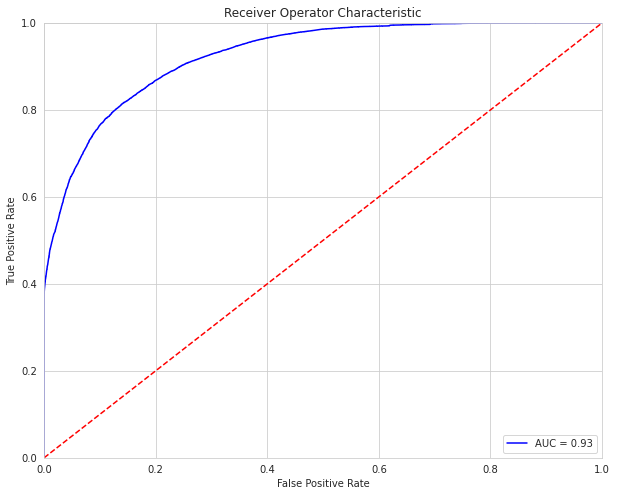

In [86]:
xgboost_predprob = xgboost.predict_proba(x_train)


preds = xgboost_predprob[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

Cross validation - Normal Data scores: [0.83998797 0.83660594 0.84172504 0.84286349 0.84211647 0.83827634
 0.83162469 0.84224375 0.83382365 0.84237336]


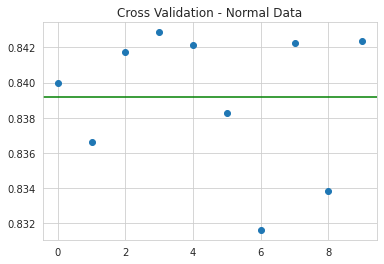

In [88]:
xgboost_scores = cross_val_score(estimator=dtree,
                        X=x_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1,
                        scoring = 'roc_auc')

print('Cross validation - Normal Data scores: {}'.format(xgboost_scores))
plt.title('Cross Validation - Normal Data')
plt.scatter(np.arange(len(xgboost_scores)), xgboost_scores)
plt.axhline(y=np.mean(xgboost_scores), color='g')
plt.show()

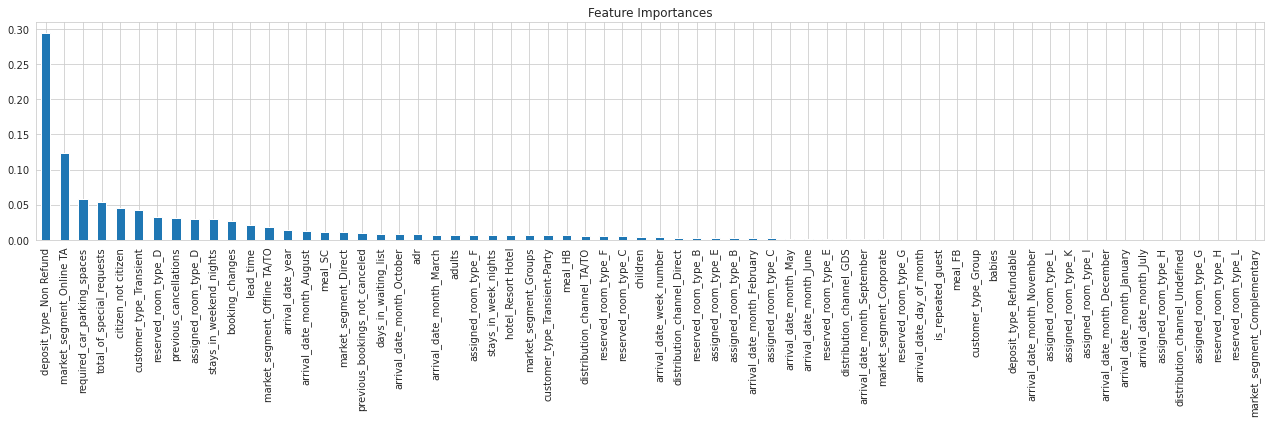

In [89]:
plt.figure(figsize=(22,4))
coef1 = pd.Series(xgboost_sm.feature_importances_, df_dummies.columns).sort_values(ascending= False)
coef1.plot(kind = 'bar', title='Feature Importances')

In [90]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [91]:
perm = PermutationImportance(xgboost_sm, scoring = 'roc_auc', random_state= 101).fit(x_train_sm, y_train_sm)
show_weights(perm, feature_names = list(df_dummies.columns))

Weight,Feature
0.0933 ± 0.0011,deposit_type_Non Refund
0.0672 ± 0.0008,citizen_not citizen
0.0392 ± 0.0007,market_segment_Online TA
0.0340 ± 0.0007,total_of_special_requests
0.0283 ± 0.0008,lead_time
0.0261 ± 0.0017,required_car_parking_spaces
0.0259 ± 0.0003,previous_cancellations
0.0122 ± 0.0002,arrival_date_year
0.0081 ± 0.0001,assigned_room_type_D
0.0075 ± 0.0004,customer_type_Transient


In [0]:
# from google.colab import files
# import pickle

# # save model
# filename = 'hotel_bookings_xgb.dat';
# pickle.dump(xgboost_sm, open(filename, 'wb'))
# files.download('hotel_bookings_xgb.dat')
# # xgboost_sm.save_model('hotel_bookings_xgb.json')
# # files.download('hotel_bookings_xgb.json')

In [0]:
# # saving algorithm for further usage
# import pickle
# filename = 'hotel_xgb_normal.sav'

# xgboost.save_model(filename)

# pickle.dump(xgboost, open(filename, 'wb'))
# files.download(filename)

In [0]:
# xgboost_sm.save_model('hotel_xgb.json')
# # xgboost_sm = xgboost_sm.train({'enable_experimental_json_serialization': True}, dtrain)
# with open('hotel_xgb.json', 'wb') as fd:
#     pickle.dump(xgboost_sm, fd)

# Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
xgboost_sm_search = GridSearchCV(xgboost_sm,
                    param_grid = {
                        'n_estimators':[100, 500, 1000],
                        'max_depth': [4, 6, 8],
                        'learning_rate': [0.01,0.05,0.10,0.50]},
                    scoring = 'recall',
                    cv = 5, n_jobs = -1)

In [0]:
xgboost_sm_search.fit(x_train_sm, y_train_sm)
# 06.04.2020 21.56-23.08

In [0]:
xgboost_sm_search.best_params_

In [0]:
xgboost_sm_search.best_score_

In [0]:
print(classification_report(y_test, xgboost_sm_search.predict(x_test)))